## Homework 3 - Data Scraping
### Nadia AlMutlak and Jonah Schaechter

### Instructions:

1. Pick a dataset from the web
2. Write a scraper that downloads the data to a file

### Deliverables:
 Code for the scraper with a file that:
1. Explains how it works and how to run it
2. Explains which database you would use to store this data.
3. Data file generated from the scraper

## Objectives: 

Deva Curl is hair care brand that advertises their product as an all-natural and environmentally-friendly way to clean curly hair.  Unfortunately, many of their customers have alleged that, in addition to washing their hair, the shampoo has also been removing large chunks of it.  A class-action lawsuit has been filed on behalf of these customers, which also cites instances of scalp irritation and damaged hair.

As Deva Curl's prosecutors search for more affected individuals to come forward, we became interested in evaluating the merit of these claims ourselves.  Our Webscraper compiles reviews of different Deva Curl products from Amazon, making them available for us to search through for any claims of falling hair.

## Code:
* Warning- Don't try to run this on jupyter, it'll take a really really _really_ long time to compile and may have other issues. Use in a proper environment.

The packages needed for this code were:
1. BeautifulSoup
2. Lxml 
3. requests

We'll also need a user agent to avoid getting blocked by amazon

Some Keyword: 
1. _ASIN_ — Amazon Standard Identification Number


In [1]:
import json
from lxml import html #Package that processes xml and html 
import requests #Is a package thats needed to request things from the internet,to get the content from a web page
from bs4 import BeautifulSoup #converts the contents of a page into a proper format.
import pandas as pd # I love pandas uwu



In [15]:
header = {'User-Agent': 'Mozilla/5.0 (compatible; Konqueror/3.3; Linux 2.4.22-xfs; X11) KHTML/3.3.2 (like Gecko)'} #Header may not work because
#Amazon may block it, make sure to change the header if you attempt to run this code. 
# url = 'https://www.amazon.com/DevaCurl-DUO-Condition-32oz-No-Poo/dp/B0045OR410/ref=sr_1_5?crid=AJS6YA5MRK95&keywords=diva+curls+products&qid=1581954316&sprefix=diva+cur%2Caps%2C140&sr=8-5#customerReviews'

def SearchFunction(search_query): # We define a search function to simulate going to the search page of amazon. This way we can easily
                                #identify the products we want using our keywords in this case "Deva + Curl"
    url="https://www.amazon.com/s?k="+search_query
    print(url)
    page=requests.get(url,headers=header) # We use requests to get the page with our bogus header,
                                          #if amazon blocks us we hit an error and the code stops.
    if page.status_code==200:
        return page
    else:
        return "Error"

In [16]:
data_asin=[] # We generate a list for the Amazon Standard Identifaction Numbers for our products. This will make it 
            # easier to generate labels, links and ratings for our products without needing to explicity find their URLs
response=SearchFunction('Deva+Curl')
soup=BeautifulSoup(response.content,features="lxml")
for i in soup.findAll("div",{'class':"sg-col-4-of-24 sg-col-4-of-12 sg-col-4-of-36 s-result-item sg-col-4-of-28 sg-col-4-of-16 sg-col sg-col-4-of-20 sg-col-4-of-32"}):
    data_asin.append(i['data-asin'])

#With the previous function (soup.findAll), we extract all the URLs associated with the tag we put in for the ASIN. 
#From that, we indexed using data-asin tag to get the text value from each URl
    
    
print("Here is the list of Amazon Standard Identification Numbers related to our product:\n",data_asin, len(data_asin))

def Searchasin(asin): #we set up a function to create a request for a page based on the asin number 
    url="https://www.amazon.com/dp/"+asin
    print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

https://www.amazon.com/s?k=Deva+Curl
Here is the list of Amazon Standard Identification Numbers related to our product:
 ['B000TK99NU', 'B000XTG912', 'B008COP6NM', 'B07ZL511RC', 'B01NAHAQBB', 'B006K26D9E', 'B000HJ4INE', 'B014U8PCNC', 'B0045OR410', 'B014GBSMUI', 'B07RWTVSZV', 'B01MQU4Q5J', 'B073G8X3R9', 'B00WIK96WS', 'B01LBN986G', 'B001PHJSU0', 'B06W2M7PXV', 'B01L9R2Q6S', 'B07C4PK9MX', 'B001NZYAYI', 'B01KW56EOI', 'B07M7PX4TG', 'B07G2T7DZL', 'B005T4CNIO', 'B07MSPH793', 'B01JM6NQVM', 'B07TVK9L26', 'B07PHSS9VG', 'B01FUVF4WC', 'B073GBVC3L', 'B001NZUMB8', 'B01NGTV39L', 'B07BK95YQ9', 'B01G9DQKVO', 'B0815B97NJ', 'B01H417X02', 'B000TKH6FI', 'B01KW6DDX2', 'B077RRC7S8', 'B01NGU4Y7L', 'B07Z5FRQKB', 'B07GBHQF2Q', 'B07KLFP9JD', 'B000NE6PCA', 'B00H2T4PR6', 'B006SJORH4', 'B01BW5EDV8', '076115678X'] 48


In [12]:
product=[]#We generate an empty list for the product names we have 
for i in range(len(data_asin)): # for each asin number we create a soup (page data) based on
    response = Searchasin(data_asin[i])
    soup = BeautifulSoup(response.content, features="lxml")
    title = soup.select("#productTitle")[0].get_text().strip() #We strip the title text for product title
    product.append(title) #then we append it to our list 
    
print("Here is the list of products we found:\n",product)

https://www.amazon.com/dp/B000XTG912
https://www.amazon.com/dp/B008COP6NM
https://www.amazon.com/dp/B07ZL511RC
https://www.amazon.com/dp/B0045OR410
https://www.amazon.com/dp/B01NAHAQBB
https://www.amazon.com/dp/B07RWTVSZV
https://www.amazon.com/dp/B000HJ4INE
https://www.amazon.com/dp/B000TK99NU
https://www.amazon.com/dp/B014GBSMUI
https://www.amazon.com/dp/B01MQU4Q5J
https://www.amazon.com/dp/B01LBN986G
https://www.amazon.com/dp/B06W2M7PXV
https://www.amazon.com/dp/B001PHJSU0
https://www.amazon.com/dp/B07C4PK9MX
https://www.amazon.com/dp/B01KW56EOI
https://www.amazon.com/dp/B001NZYAYI
https://www.amazon.com/dp/B01L9R2Q6S
https://www.amazon.com/dp/B014U8PCNC
https://www.amazon.com/dp/B006K26D9E
https://www.amazon.com/dp/B07M7PX4TG
https://www.amazon.com/dp/B005T4CNIO
https://www.amazon.com/dp/B07G2T7DZL
https://www.amazon.com/dp/B00WIK96WS
https://www.amazon.com/dp/B07TVK9L26
https://www.amazon.com/dp/B01FUVF4WC
https://www.amazon.com/dp/B001NZUMB8
https://www.amazon.com/dp/B0815B97NJ
h

# We wont run the next codes because they parse through all the reviews
#                     (a total of 11,600+ reviews for 48 products)

In [ ]:
# one issue is if you only use the front page of the product, you only get a few of the product reviews.
#Instead we need to scrape the pages of reviews that exist once you click see all, so we generate a list for the links
#of see all for each product
link=[]
for i in range(len(data_asin)):
    response=Searchasin(data_asin[i])
    soup=BeautifulSoup(response.content,features="lxml")
    for i in soup.findAll("a",{'data-hook':"see-all-reviews-link-foot"}):
        link.append(i['href'])

In [ ]:
#We set up a function for requesting the correct review page once we start to parse thru the see all pages 
def Searchreviews(review_link):
    url="https://www.amazon.com"+review_link
    print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [ ]:
# Here we generate two lists, one for the product name to be matched with its respective review in a dictionary later. 
matched_product=[]
reviews=[]
for j in range(len(link)): #This loop will compute the first 50 pages of reviews for each product 
                            #and append the review and product name to the list 
    for k in range(50):
        #print(product[j])
        response=Searchreviews(link[j]+'&pageNumber='+str(k))
        soup=BeautifulSoup(response.content)
        for i in soup.findAll("span",{'data-hook':"review-body"}):
            reviews.append(i.text)
            matched_product.append(product[j])

In [ ]:
dataset={"Product Name": matched_product ,'reviews':reviews} #converts our lists into dictionaries
scraped_data=pd.DataFrame.from_dict(dataset) #creates a df from the dictionary
scraped_data.to_csv('Scraping_data.csv',index=False)


We attempted to also account for the star rating of the product, however, not all the reviews had the same hook for the rating. Some reviews didn't even have any star rating at all. We could do this in a next iteration by including some exceptions for the empty star ratings. If we spend some more time identifying all the possible hooks for ratings, we could generate a function to parse for them all. However, for the sake of this homework, we thought it was enough to produce the product name and its review. 

## Type of Dataset Discussion

We believe that Elasticsearch would be an appropriate database for this data, given its intended purpose.  The Reviews could be turned into lists of key words, and then theses lists could be searched for certain words, like "bad", "bald", and "falling", in order to determine the sentiment of the review.

There may be a way to configure 

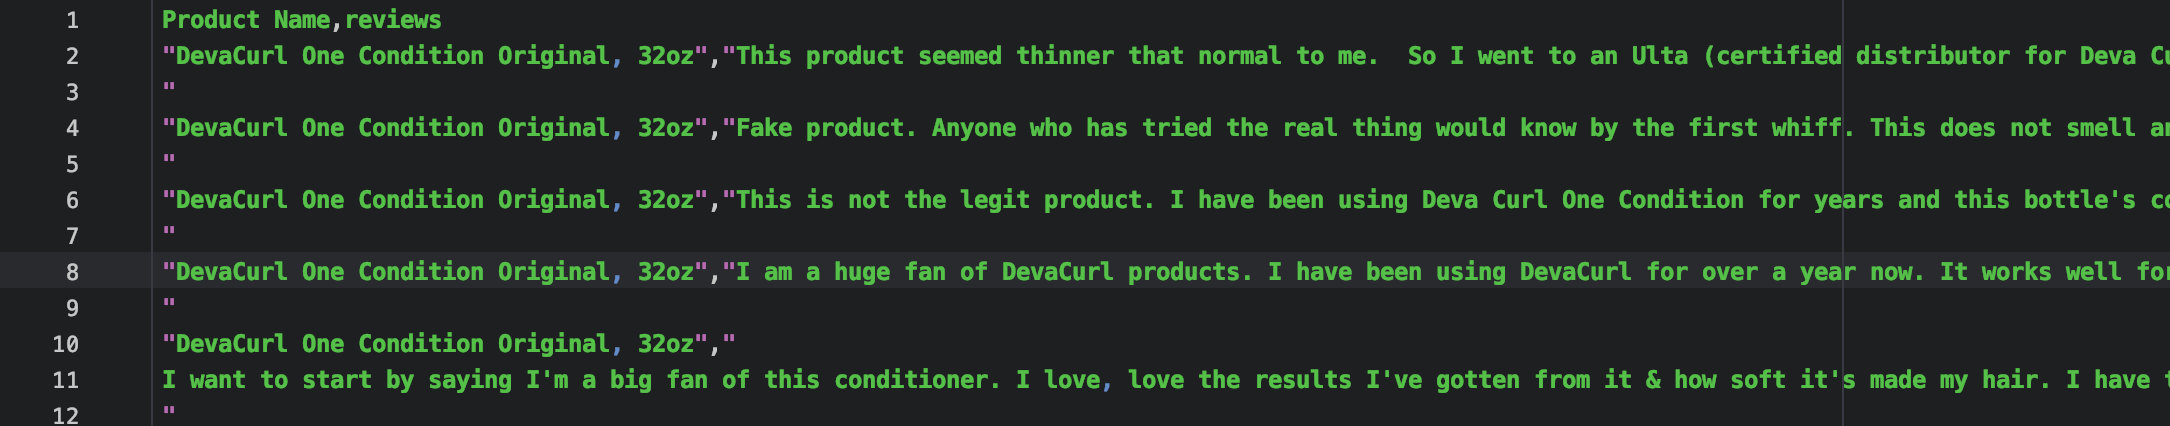

In [17]:
from IPython.display import Image
Image("/Users/nadiam/2-DSforMechanics/Homework3/screenshot.png")

This is how our CSV looks in PyCharm with two columns, one for the product name and the other for the review. Theoretically, this data set would be formatted and cleaned up so that we wouldn't need redundant product names, especially because some products are repeated in different sizes or as part of bundles. 

# Citations

[1] Article on the DevaCurl Lawsuit:  https://www.npr.org/2020/02/15/806366035/devacurl-faces-class-action-lawsuit-alleging-hair-loss

[2] BeautifulSoup Documentation - https://www.crummy.com/software/BeautifulSoup/bs4/doc/

[3] Website with a mass number of user agents - http://www.bitforestinfo.com/2017/05/what-is-user-agent-string-and-list-of-1000-user-string-list-for-web-scraping-and-for-http-request.html

[4] https://www.knoyd.com/blog/amazon-review-scraper

